Постройте графики продолжительности светового дня в каждом городе в мае, используя информацию с сайта https://sunrise-sunset.org/api и координаты городов

In [19]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

cities = {
    "Рейкьявик": (64.136, -21.92, "Atlantic/Reykjavik"),
    "Лондон": (51.514, -0.093, "Europe/London"),
    "Сингапур": (17.469, 78.126, "Asia/Singapore"),
    "Рим": (41.902, 12.508, "Europe/Rome"),
    "Великий Новгород": (58.523, 31.270, "Europe/Moscow")
}

month = 5
year = 2023
day_length_data = {}

for city, (lat, lon, tzid) in cities.items():
    day_lengths = []
    for day in range(1, 32):
        date = f"{year}-{month:02d}-{day:02d}"
        url = f"https://api.sunrise-sunset.org/json?lat={lat}&lng={lon}&date={date}&formatted=0&tzid={tzid}"
        response = requests.get(url)
        data = response.json()
        
        # Проверка на наличие ошибок в ответе
        if 'results' in data:
            day_length = data['results']['day_length']  # в секундах
            day_lengths.append(day_length / 3600)  # переводим в часы
        else:
            day_lengths.append(None)  # Если данные недоступны

    day_length_data[city] = day_lengths


day_length_data

{'Рейкьявик': [16.93722222222222,
  17.049444444444443,
  17.161944444444444,
  17.274166666666666,
  17.386388888888888,
  17.49888888888889,
  17.610833333333332,
  17.723055555555554,
  17.835,
  17.946944444444444,
  18.058611111111112,
  18.170277777777777,
  18.281388888888888,
  18.3925,
  18.503333333333334,
  18.613333333333333,
  18.72361111111111,
  18.833055555555557,
  18.941944444444445,
  19.05027777777778,
  19.158333333333335,
  19.26527777777778,
  19.371388888888887,
  19.476944444444445,
  19.58111111111111,
  19.684722222222224,
  19.786666666666665,
  19.8875,
  19.986666666666668,
  20.084444444444443,
  20.180555555555557],
 'Лондон': [14.903333333333334,
  14.961944444444445,
  15.020277777777778,
  15.078055555555556,
  15.135277777777778,
  15.191944444444445,
  15.248055555555556,
  15.303333333333333,
  15.358333333333333,
  15.4125,
  15.466111111111111,
  15.518888888888888,
  15.571111111111112,
  15.622777777777777,
  15.673055555555555,
  15.7230555555

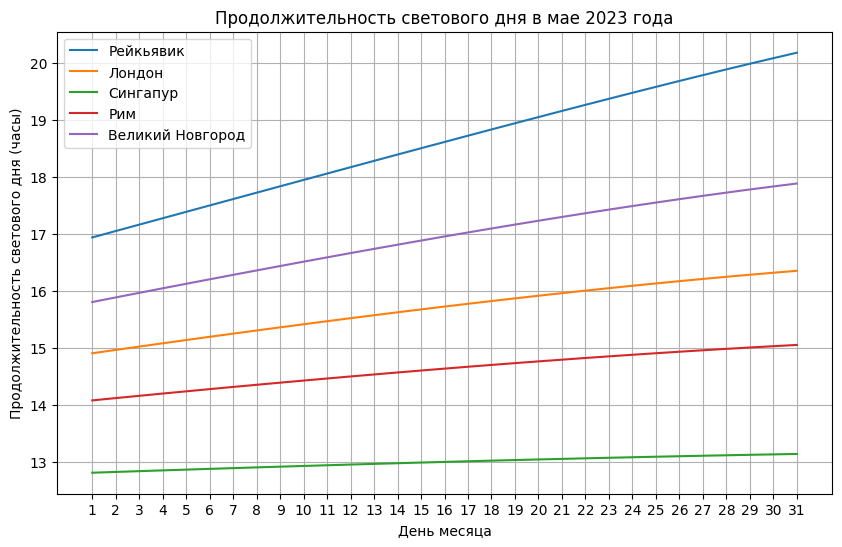

In [21]:
plt.figure(figsize=(10, 6))
for city, lengths in day_length_data.items():
    plt.plot(range(1, len(lengths) + 1), lengths, label=city)

plt.title('Продолжительность светового дня в мае 2023 года')
plt.xlabel('День месяца')
plt.ylabel('Продолжительность светового дня (часы)')
plt.xticks(range(1, 32))  # дни от 1 до 31
plt.legend()
plt.grid()
plt.show()